In [1]:
import numpy as np
import matplotlib.pyplot as plt

/home/dedenbangkit/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Parameters for the image resolution and iteration count
width, height = 1000, 1000
xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5
max_iter = 500
samples = 1000000  # Number of random samples

In [3]:
# Create a grid for the image
buddhabrot = np.zeros((height, width))

In [4]:
# Map complex plane to pixel grid
def complex_to_pixel(z):
    x = int((z.real - xmin) / (xmax - xmin) * width)
    y = int((z.imag - ymin) / (ymax - ymin) * height)
    return x, y

In [5]:
# Iterate through random points in the complex plane
for _ in range(samples):
    # Randomly select a complex number
    c = complex(np.random.uniform(xmin, xmax), np.random.uniform(ymin, ymax))
    z = 0 + 0j
    trajectory = []
    
    # Iterate the Mandelbrot function
    for i in range(max_iter):
        if abs(z) > 2:
            # Escape detected, record the trajectory
            for t in trajectory:
                px, py = complex_to_pixel(t)
                if 0 <= px < width and 0 <= py < height:
                    buddhabrot[py, px] += 1
            break
        trajectory.append(z)
        z = z**2 + c

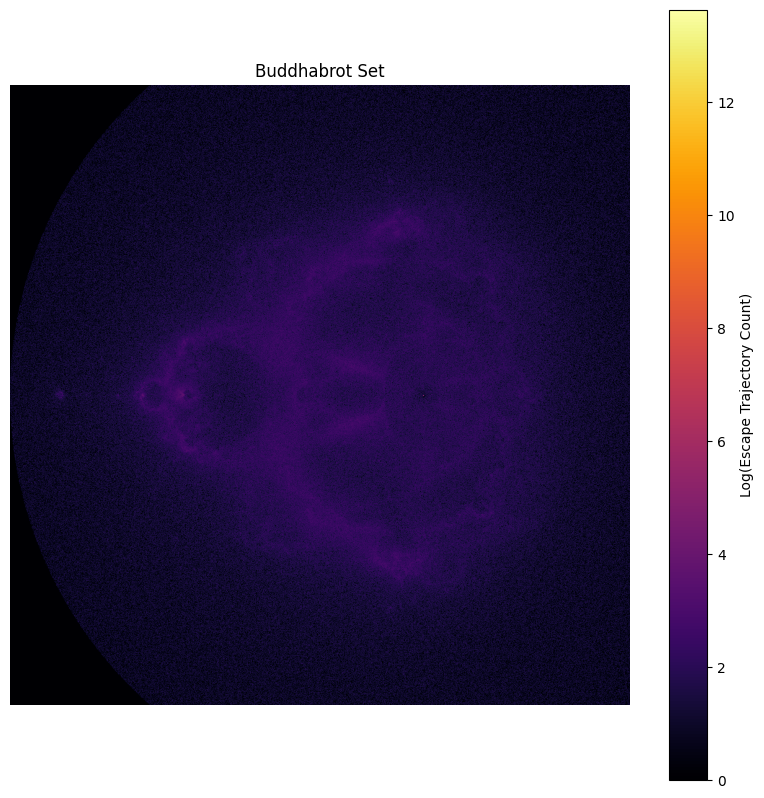

In [6]:
# Normalize and plot the Buddhabrot set
plt.figure(figsize=(10, 10))
plt.imshow(np.log(buddhabrot + 1), extent=[xmin, xmax, ymin, ymax], cmap='inferno')
plt.colorbar(label='Log(Escape Trajectory Count)')
plt.title('Buddhabrot Set')
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')
plt.axis('off')
plt.show()